In [37]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [38]:
#importing data and shuffling the data
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,92469.0,0.038009,0.990823,0.292928,0.495378,1.303906,-0.874951,1.940270,-1.130083,1.613408,...,-0.149807,0.312096,-0.346760,-0.107028,0.026742,-0.722286,-0.869391,-0.637298,23.21,0
1,78365.0,1.108033,0.262369,-0.062800,1.246383,-0.205795,-1.355922,0.652852,-0.390785,-0.295612,...,0.069066,0.079030,-0.170357,0.733909,0.778175,-0.324390,-0.022396,0.027211,77.12,0
2,81841.0,-1.052514,0.056349,1.173187,-1.981609,-0.459709,-0.809827,-0.325010,0.506184,-1.593326,...,-0.215689,-0.537223,-0.164861,0.010463,-0.091185,0.898929,-0.130409,-0.047713,0.95,0
3,107510.0,1.940991,-0.106712,-0.061042,0.444285,-0.513541,-0.491934,-0.536963,-0.122404,2.141252,...,-0.192176,-0.151036,0.343072,-0.006027,-0.390002,-0.993095,0.036535,-0.038600,7.30,0
4,75814.0,1.256399,0.402563,0.319918,0.687153,-0.312050,-1.057312,0.132652,-0.242107,-0.069354,...,-0.279744,-0.774919,0.121134,0.363790,0.238751,0.092129,-0.018714,0.032303,1.98,0


In [39]:
#seperating the different classes in a data set
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


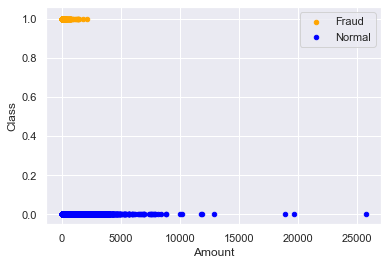

In [44]:
# Scatter plot of both classes
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [12]:
#splitting x and y
x = df[:][:]
x.pop("Class")
x1 = x.values
print(x1)
y = df["Class"]
y1 = y.values
print(y1)
#spliting train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size = 0.4, random_state = 0)
print(xtrain)
print(ytrain)
print(xtest)
print(ytest)


[[ 1.54635000e+05  1.63859551e+00 -7.37438292e-01 ... -5.54685944e-02
  -2.03408661e-02  2.20270000e+02]
 [ 5.84450000e+04  1.41887519e+00 -5.08627122e-01 ...  4.98581236e-03
   1.88471583e-02  1.50000000e+01]
 [ 1.23505000e+05  1.82257008e+00 -5.49534393e-01 ...  5.86083190e-02
  -3.10035134e-02  4.50000000e+01]
 ...
 [ 6.90360000e+04 -5.50956668e-01  1.17601017e+00 ...  3.53921467e-01
   1.31721376e-01  9.99000000e+00]
 [ 9.40370000e+04  2.14998409e+00 -2.16133919e-01 ... -6.57933455e-02
  -8.65034039e-02  1.20000000e-01]
 [ 1.31019000e+05  2.12532158e+00 -1.75136275e+00 ... -1.21858613e-03
  -3.72958765e-02  9.50000000e+01]]
[0 0 0 ... 0 0 0]
[[ 1.18903000e+05  2.02446656e+00 -1.83458733e+00 ... -3.50993532e-03
  -2.56131225e-02  1.47650000e+02]
 [ 1.18409000e+05  1.52261675e+00 -8.80767062e-01 ...  1.09998588e-02
   8.37167619e-03  2.31200000e+02]
 [ 7.21990000e+04  1.04643259e+00 -3.61293513e-01 ... -5.19898756e-02
   1.41576670e-02  6.99800000e+01]
 ...
 [ 5.72630000e+04  1.29696

In [45]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
obj = RandomForestClassifier(n_estimators=10)
obj.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
#training accuracy
ypredict = obj.predict(xtrain)
from sklearn.metrics import classification_report
report1 = classification_report(ytrain, ypredict)
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170609
           1       1.00      0.95      0.97       275

    accuracy                           1.00    170884
   macro avg       1.00      0.97      0.99    170884
weighted avg       1.00      1.00      1.00    170884



In [49]:
#validation accuracy
ypred = obj.predict(xtest)
report2 = classification_report(ytest, ypred)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113706
           1       0.95      0.71      0.81       217

    accuracy                           1.00    113923
   macro avg       0.98      0.85      0.91    113923
weighted avg       1.00      1.00      1.00    113923

